## Business Context descreption

Data source [Link](https://www.kaggle.com/code/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86)

## Data importation

## Packages instalation

## Library importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('C:\\Abdelouaheb\\perso\\Ph\\machine_learning_pipeline\\data\\raw\\diabetes.csv')

## Data overview

### Show the first 05 rows of the data and last 05 rows of the data

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

## Data Preprocessing

### 1.Data shape

In [6]:
print('The data contains:', df.shape[1], 'columns with the names: ', df.columns.values)
print('-------------------------------------------')
print('The data contains:', df.shape[0], 'rows')

The data contains: 9 columns with the names:  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
-------------------------------------------
The data contains: 768 rows


In [ ]:
df

### 2.Unique ID


In [ ]:
#print('Id is unique.') if train_df.PassengerId.nunique() == train_df.shape[0] else print('oops')
#print('Train and test sets are distinct.') if len(np.intersect1d(train_df.PassengerId.values, test_df.PassengerId.values))== 0 else print('oops')

### 3. Missing values chack

In [19]:
print('The data has not missing values') if df.isnull().values.any() ==  False  else print('The data has messing value')

The data has not missing values


### 4.Check the data structure

In [7]:
df1 = pd.DataFrame(data=df.dtypes, columns=['types'])
df1

types
Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                       float64
DiabetesPedigreeFunction  float64
Age                         int64
Outcome                     int64

In [8]:
print('No categorial features') if len(df.select_dtypes(exclude=[np.number]).columns.values) == 0  else print( 'Categorical features:',df.select_dtypes(exclude=[np.number]).columns.values)
print("_"*40)
print('No Numeric features') if len(df.select_dtypes(include=[np.number]).columns.values) == 0  else print( 'Numeric features:',df.select_dtypes(include=[np.number]).columns.values)

No categorial features
________________________________________
Numeric features: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


### 5. Explotary data analysis : Only Numeric features

#### 5.1. Descreptive statisitics / [link text](https://realpython.com/python-statistics/)

#####5.1.1 Central tendency measures/Central tendency tells you about the centers of the data. Useful measures include the mean, median, and mode.

In [9]:
df_statistics = df.describe()
df_statistics

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
df_median= pd.DataFrame(data=df.median(axis=0), columns=['median']).transpose()
df_median

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
median          3.0    117.0           72.0           23.0     30.5  32.0   

        DiabetesPedigreeFunction   Age  Outcome  
median                    0.3725  29.0      0.0

In [11]:
df_mode= pd.DataFrame(data=df.mode(axis=0), columns=['mode']).transpose()
df_mode

0   1
mode NaN NaN

In [12]:
df_stat= pd.concat([df_median,df_statistics])
df_stat

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
median     3.000000  117.000000      72.000000      23.000000   30.500000   
count    768.000000  768.000000     768.000000     768.000000  768.000000   
mean       3.845052  120.894531      69.105469      20.536458   79.799479   
std        3.369578   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age     Outcome  
median   32.000000                  0.372500   29.000000    0.000000  
count   768.000000                768.000000  768.000000  768.000000  
mean     31.992578                  0.471876   33.240885    0.348958  
std       7.884160                  0.331329   11.760232    0.476951  
min       0.000000                  0.078000   21.000000    0.000000  
25%      27.300000                  0.243750   24.000000    0.000000  
50%      32.000000                  0.372500   29.000000    0.000000  
75%      36.600000                  0.626250   41.000000    1.000000  
max      67.100000                  2.420000   81.000000    1.000000

Skewness¶
The skewness measures the extend to which the data values are not symmertic around the mean. For normal distribution the portion of the curve below the mean will be mirror image of the portion of the curve above the mean thus skewness will be zero.

Symmetric:- When the median of the distribution is in the middle of the box, and the whiskers are about the same on both sides of the box.

Positively or Right skewed :- When the median of the distributio is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box.

Negatively or skewed :- When the median of the distribution is closer to the top of the box, and if the whisker is shorter on the upper end of the box.

In [13]:
#calculate sample skewness

df_skew= pd.DataFrame(data=df.skew(axis=0), columns=['skewness']).transpose()

Kurtosis
It measures the peakedness of the curve of the distribution or how sharply the curve raises apporaching centre of ditribution. It compares the shape of the peak to shape of the peak of normal distribution.

The excess kurtosis is defined as kurtosis minus 3. There are 3 distinct regimes as described below.

Mesokurtic :- The kurtosis of any univariate normal distribution is 3 and is called mesokurtic.

Leptokurtic :- The distribution will have a sharper-rising centre of peak, with a higher concentration of values near the mean with a fatter tail that is many values in the tail compared to normal distribution and kurtosis greater than 3 and a positive excess kurtosis.

Platykurtic :- The distribution will have less centre of peak compared to normal distribution and have a negative excess kurtosis.

In [14]:
#calculate sample kurtosis
df_kurtosis= pd.DataFrame(data=df.kurtosis(axis=0), columns=['kurtosis']).transpose()

In [15]:
df_stat= pd.concat([df_median,df_statistics,df_skew,df_kurtosis])
df_stat

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
median       3.000000  117.000000      72.000000      23.000000   30.500000   
count      768.000000  768.000000     768.000000     768.000000  768.000000   
mean         3.845052  120.894531      69.105469      20.536458   79.799479   
std          3.369578   31.972618      19.355807      15.952218  115.244002   
min          0.000000    0.000000       0.000000       0.000000    0.000000   
25%          1.000000   99.000000      62.000000       0.000000    0.000000   
50%          3.000000  117.000000      72.000000      23.000000   30.500000   
75%          6.000000  140.250000      80.000000      32.000000  127.250000   
max         17.000000  199.000000     122.000000      99.000000  846.000000   
skewness     0.901674    0.173754      -1.843608       0.109372    2.272251   
kurtosis     0.159220    0.640780       5.180157      -0.520072    7.214260   

                 BMI  DiabetesPedigreeFunction         Age     Outcome  
median     32.000000                  0.372500   29.000000    0.000000  
count     768.000000                768.000000  768.000000  768.000000  
mean       31.992578                  0.471876   33.240885    0.348958  
std         7.884160                  0.331329   11.760232    0.476951  
min         0.000000                  0.078000   21.000000    0.000000  
25%        27.300000                  0.243750   24.000000    0.000000  
50%        32.000000                  0.372500   29.000000    0.000000  
75%        36.600000                  0.626250   41.000000    1.000000  
max        67.100000                  2.420000   81.000000    1.000000  
skewness   -0.428982                  1.919911    1.129597    0.635017  
kurtosis    3.290443                  5.594954    0.643159   -1.600930

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

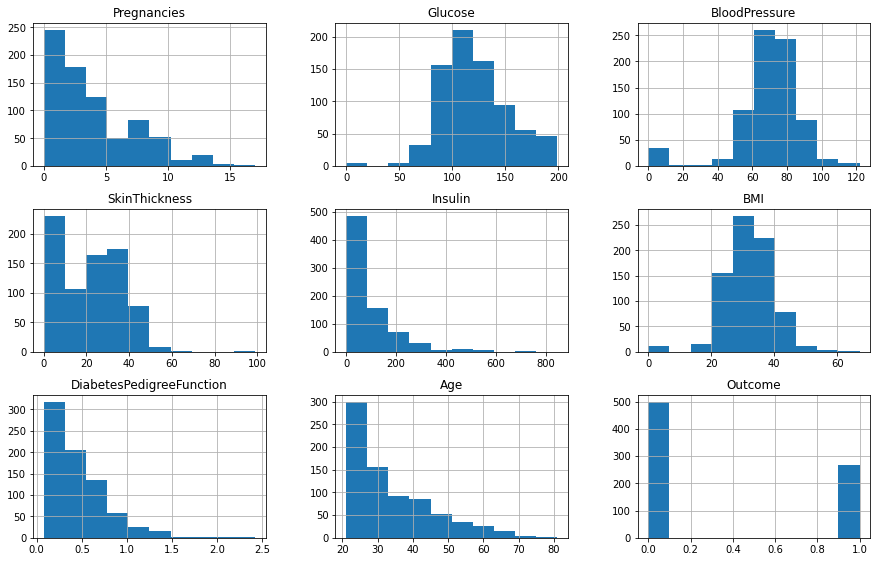

In [16]:
df.hist(figsize=(15,30),layout=(9,3))

AttributeError: 'AxesSubplot' object has no attribute 'full_screen_toggle'

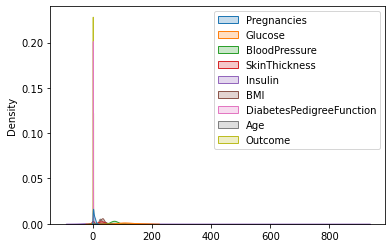

In [17]:
fig, ax = plt.subplots()

# ax = sns.kdeplot(data=classical['stream'], label='classical streams', ax=ax)
# ax = sns.kdeplot(data=hiphop['stream'], label='hiphop streams', ax=ax)
# ax = sns.kdeplot(data=indiepop['stream'], label='indiepop streams', ax=ax)

# for this final one I use the shade option just to show how it is done:
ax = sns.kdeplot(data=df, label='indierock streams', ax=ax, shade=True)

ax.full_screen_toggle()
plt.show()

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


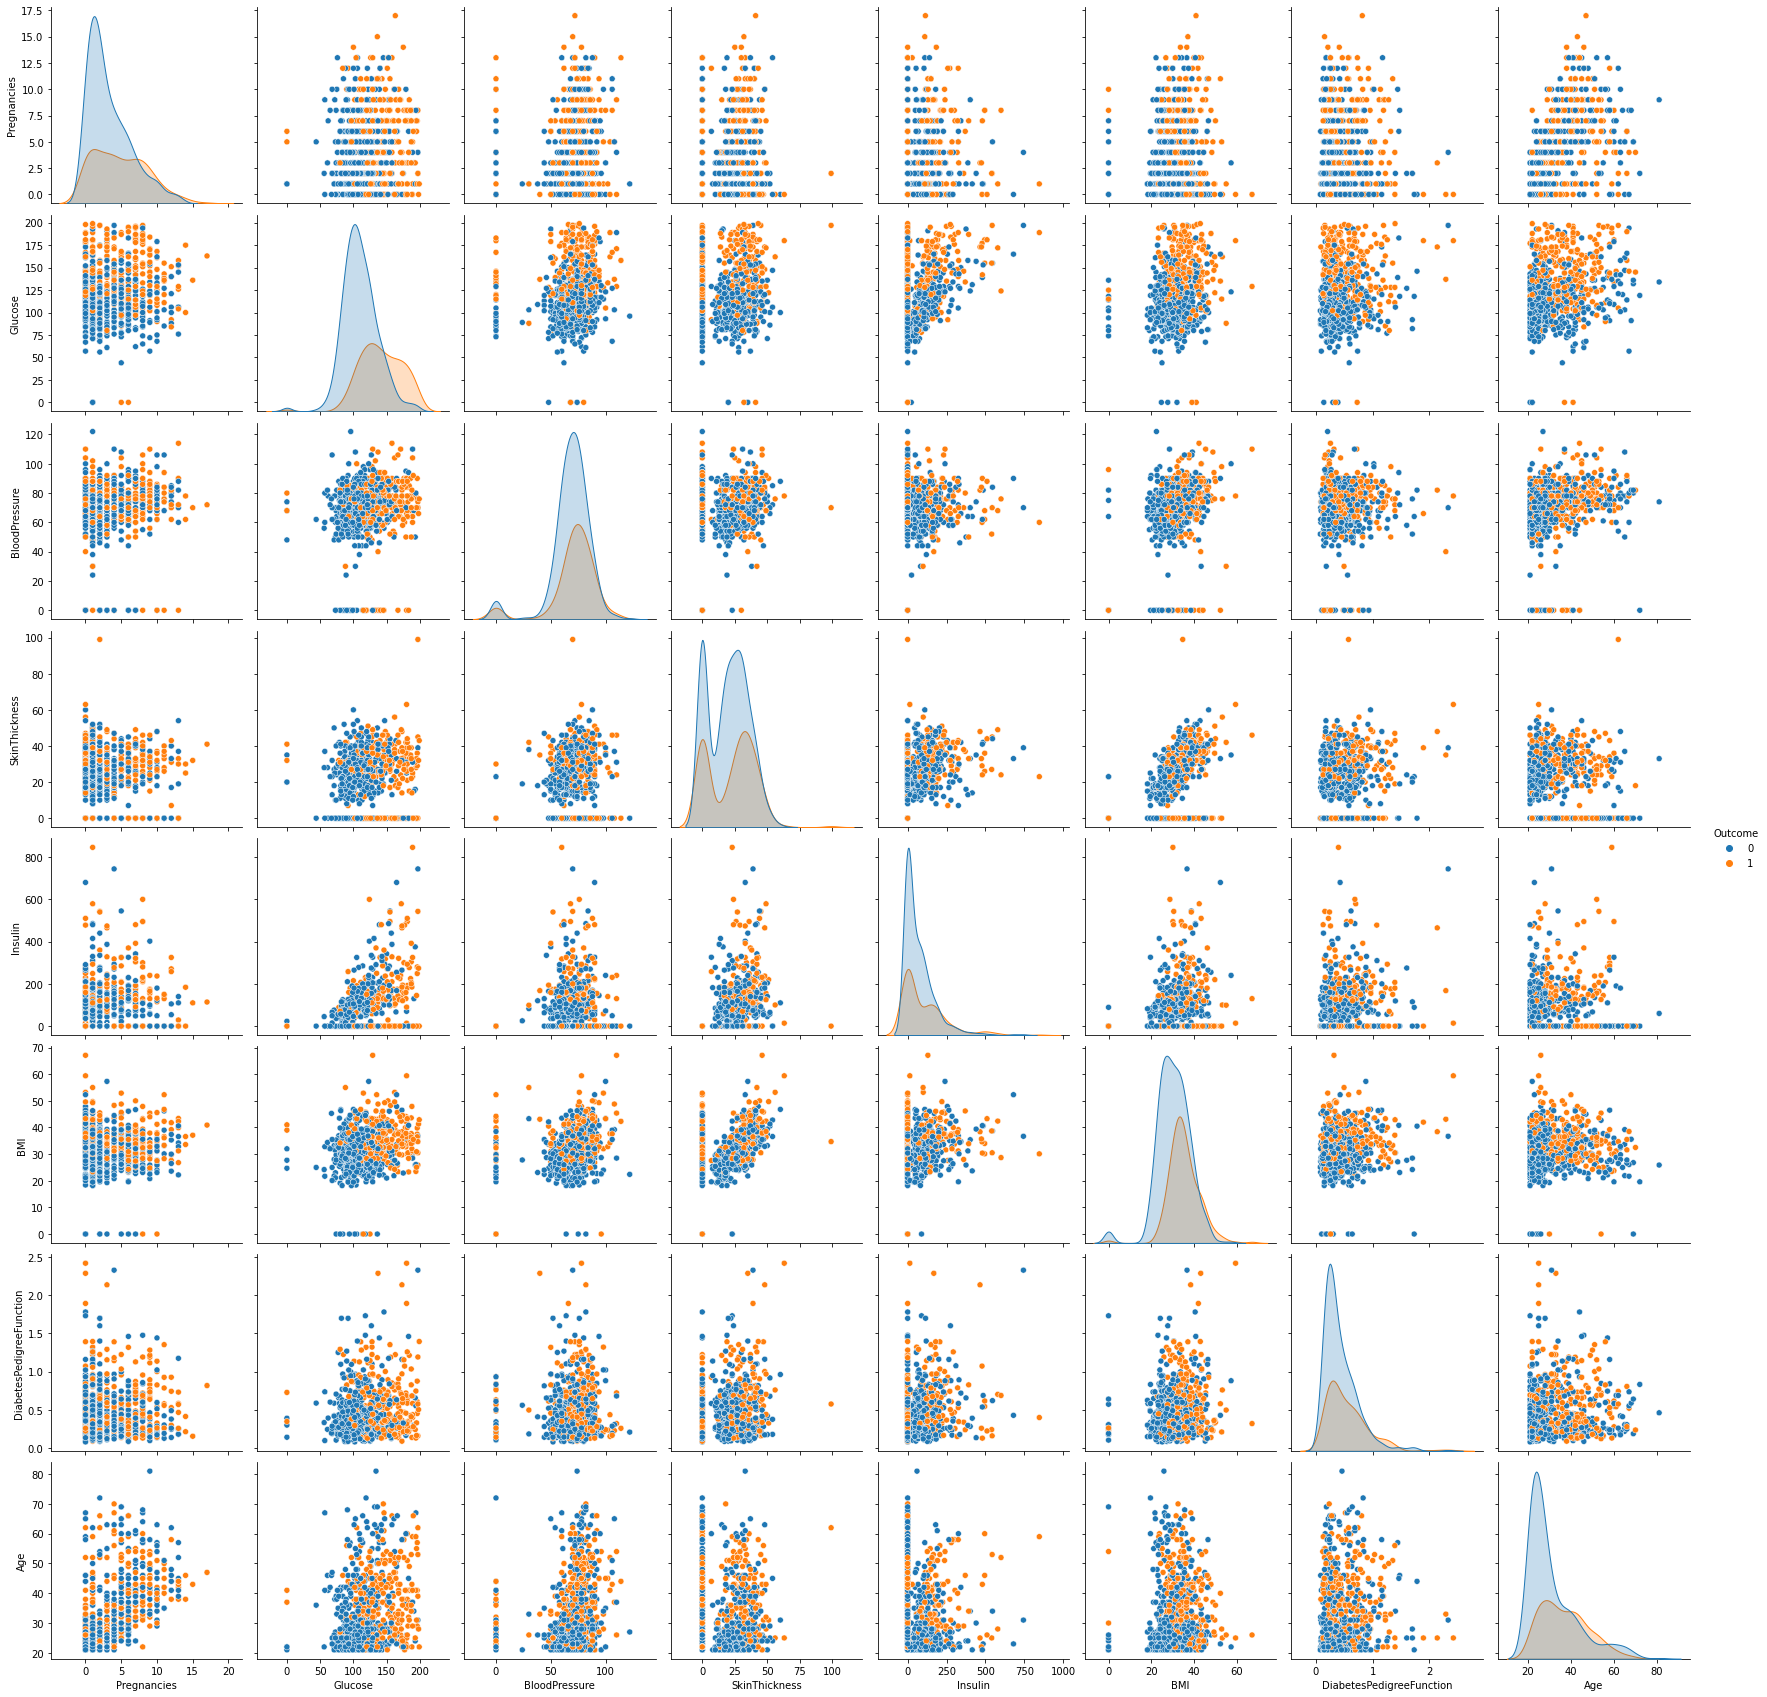

In [18]:
sns.pairplot(df, hue="Outcome", size=3, diag_kind="kde")